In [1]:
import os
import docx2txt
import PyPDF2
import pptx
import textract
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
def preprocess(text):
    # Remove all non-alphanumeric characters
    text = "".join(char.lower() for char in text if char.isalnum() or char.isspace())
    # Tokenize the text
    words = text.split()
    return " ".join(words)

In [3]:
# Prompt user for file path
file_path = input("Enter the file path: ")

Enter the file path: /content/6.pdf


In [4]:
# Extract the text from the file
if file_path.endswith('.txt'):
    with open(file_path, 'r') as file:
        content = file.read()
elif file_path.endswith('.docx'):
    content = docx2txt.process(file_path)
elif file_path.endswith('.pdf'):
    # Open the PDF file
    with open(file_path, 'rb') as file:
        # Create a PDF reader object
        pdf_reader = PyPDF2.PdfReader(file)
        # Get the total number of pages in the PDF file
        num_pages = len(pdf_reader.pages)
        # Loop through all the pages and extract text
        for page in range(num_pages):
            pdf_page = pdf_reader.pages[page]
            page_text = pdf_page.extract_text()
            # Do something with the text
            print(page_text)
elif file_path.endswith('.pptx'):
    prs = pptx.Presentation(file_path)
    content = ""
    for slide in prs.slides:
        for shape in slide.shapes:
            if hasattr(shape, "text"):
                content += shape.text
            else:
                print("Error extracting text: shape has no attribute 'text'")
elif file_path.endswith('.doc'):
    print("Warning: .doc files are not supported. Converting to .docx...")
    os.system(f"unoconv -f docx {file_path}")
    file_path = file_path + "x"
    content = docx2txt.process(file_path)
    os.remove(file_path)
else:
    content = textract.process(file_path).decode('utf-8')

SIFT Algorithm and Applications
Dr. Mohamed Waleed Fakhr
2023
Scale Invariant Feature Transform (SIFT) 
Local Descriptors
•SIFT has become one of the most important 
local image features. 
•It is used in image Stitching and panorama 
creation, image registration, image retrieval, 
image classification, object detection, etc.
Step 1: find interest points using the DoG approach which detects 
interest points
Step 2: Extract a 128-dimension vector at each interest point

Example: Object Recognition
Lowe, IJCV 04SIFT is extremely powerful for object instance 
recognition, especially for well -textured objects
5
panorama?
•We need to match (align) images
6
Matching with Features
•Detect feature points in both images
7
Matching with Features
•Detect feature points in both images
•Find corresponding pairs
8
Matching with Features
•Detect feature points in both images
•Find corresponding pairs
•Use these matching pairs to align images -the 
required mapping is called a homography .
9
Character

In [5]:
content = "6.pdf"
# Preprocess the text
content = preprocess(content)

In [6]:
# Prompt user for reference text
reference = input("Enter the reference text: ")
# Preprocess the reference text
reference = preprocess(reference)

Enter the reference text: 6.pdf


In [7]:
# Generate the TF-IDF matrix
vectorizer = CountVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform([content, reference])

In [8]:
# Calculate the cosine similarity
similarity = cosine_similarity(tfidf)

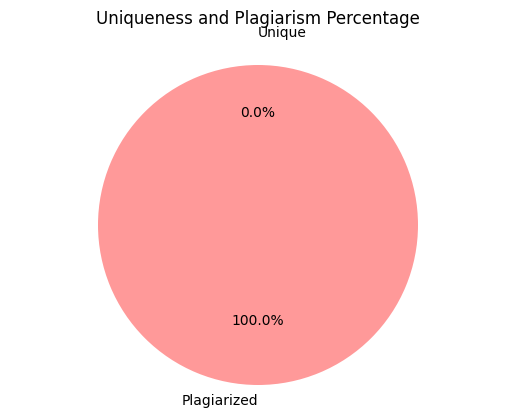

In [9]:
# Calculate the uniqueness and plagiarism percentages
if similarity.size == 1:
    print("Error: Similarity matrix has only one element.")
else:
    uniqueness = 100 - (similarity[0][1] * 100)
    plagiarism = similarity[0][1] * 100
    # Display the results in a graph
    labels = ['Unique', 'Plagiarized']
    percentages = [uniqueness, plagiarism]
    explode = [0.1, 0]
    colors = ['#66b3ff','#ff9999']
    fig1, ax1 = plt.subplots()
    ax1.pie(percentages, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    plt.title('Uniqueness and Plagiarism Percentage')
    plt.show()